In [1]:
#figure out why u=0 does not give rho0 for r=2.3
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from tqdm.auto import trange
from time import time
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import kwant
from numpy import sqrt
import scipy
from itertools import repeat
from numba import njit

import DEDlib

In [1]:
np.linspace(-3,3,1001)[501]


NameError: name 'np' is not defined

In [38]:
"$\\rho$"

'$\\rho$'

In [57]:
sum(np.logspace(2.0, 5, num=50, base=10,dtype='int'))*20/10/60/60/24

17.588773148148146

In [36]:
DOST=np.zeros((16,1001),dtype = 'float')

In [17]:
s.shape

(50,)

In [18]:
b.shape

(50, 1001)

In [24]:
len(np.mean(np.zeros((50,1001)),axis=1))

50

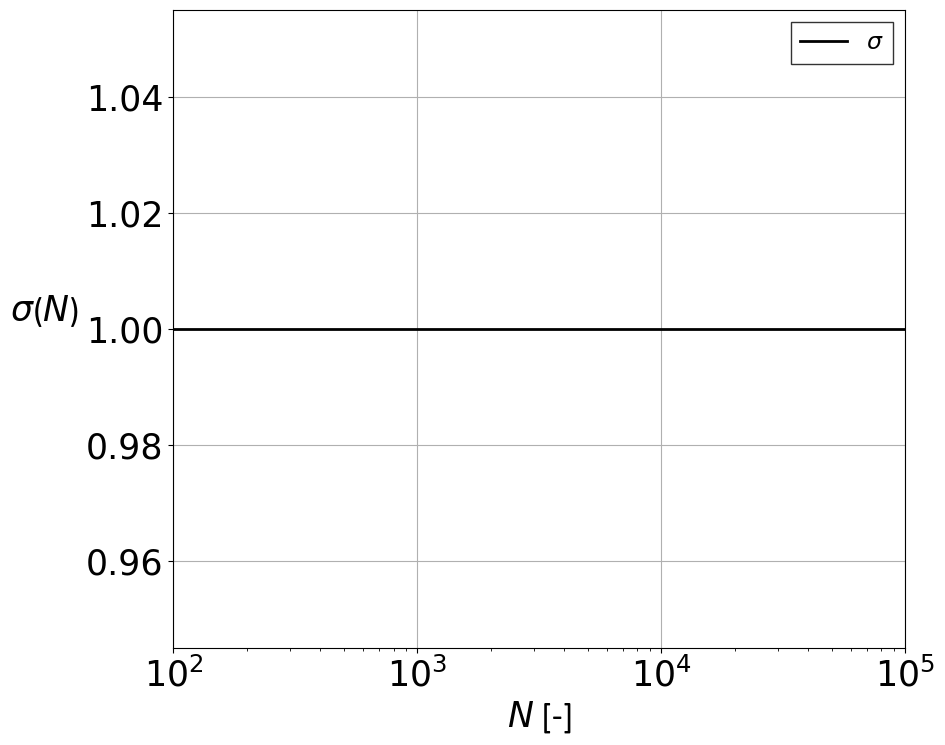

<module 'matplotlib.pyplot' from 'c:\\Users\\roelv\\OneDrive\\Documenten\\VSC\\.conda\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [5]:
import DEDlib
DEDlib.stdplot(np.logspace(2.0, 5, num=50, base=10,dtype='int'),np.ones((50,1001)),'g','$\\sigma$')

In [33]:
np.insert(b,0,s, axis=1)

array([[   100.,      0.,      0., ...,      0.,      0.,      0.],
       [   115.,      0.,      0., ...,      0.,      0.,      0.],
       [   132.,      0.,      0., ...,      0.,      0.,      0.],
       ...,
       [ 75431.,      0.,      0., ...,      0.,      0.,      0.],
       [ 86851.,      0.,      0., ...,      0.,      0.,      0.],
       [100000.,      0.,      0., ...,      0.,      0.,      0.]])

In [34]:

np.savetxt('test.txt',np.insert(b,0,s, axis=1),delimiter='\t', newline='\n')

In [26]:
s,b=np.logspace(2, 5, num=50, base=10,dtype='int'),np.zeros((50,1001))
tot=np.append(b,s, axis=0)
tot

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [ ]:
np.savetxt('test.txt',s,delimiter='\t', newline='\n')

In [48]:
d=np.zeros(5)

for x,d2 in enumerate(d):
    d2=1
    print(d2)
print(d)

1
1
1
1
1
[0. 0. 0. 0. 0.]


In [37]:
std=np.sqrt(np.sum([(dat-np.mean(DOST,axis=0))**2 for dat in DOST],axis=0)/(len(DOST)-1))
stdavg=std/np.sqrt(len(DOST))

In [17]:
data=np.array([[1,4,5,3,2,5,4,3,4,4,4,2,1,1,2,3,4],[3,4,5,3,2,5,4,3,3,4,4,2,5,1,2,4,4],[3,1,1,1,1,1,1,1,1,4,4,3,3,3,1,2,1]])
print(np.std(data,axis=0),np.var(data,axis=0),np.mean(data,axis=0))

[0.94280904 1.41421356 1.88561808 0.94280904 0.47140452 1.88561808
 1.41421356 0.94280904 1.24721913 0.         0.         0.47140452
 1.63299316 0.94280904 0.47140452 0.81649658 1.41421356] [0.88888889 2.         3.55555556 0.88888889 0.22222222 3.55555556
 2.         0.88888889 1.55555556 0.         0.         0.22222222
 2.66666667 0.88888889 0.22222222 0.66666667 2.        ] [2.33333333 3.         3.66666667 2.33333333 1.66666667 3.66666667
 3.         2.33333333 2.66666667 4.         4.         2.33333333
 3.         1.66666667 1.66666667 3.         3.        ]


In [22]:
np.sqrt(np.sum([(dat-np.mean(data,axis=0))**2 for dat in data],axis=0)/(len(data)-1))/np.sqrt(len(data))

array([0.66666667, 1.        , 1.33333333, 0.66666667, 0.33333333,
       1.33333333, 1.        , 0.66666667, 0.8819171 , 0.        ,
       0.        , 0.33333333, 1.15470054, 0.66666667, 0.33333333,
       0.57735027, 1.        ])

In [26]:
np.zeros((5,4,2),dtype = 'float')

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [24]:
x=(1,2)

y=np.zeros((2,2))

y[0]=x

In [25]:
y

array([[1., 2.],
       [0., 0.]])

In [ ]:
N=10000
poles=4
U=3
Sigma=3/2
Ed=-3/2
Gamma=0.3
SizeO=1001
etaco=[0.02,1e-39]
ctype='n'
bound=3
Tk=[0]
posb=1

omega,eta,selectpcT,selectpT= np.linspace(-bound,bound,SizeO),etaco[0]*abs(np.linspace(-bound,bound,SizeO))+etaco[1],[],[]

kb=1
NewM,nonG,select=Startrans(poles,np.sort(Lorentzian(omega, Gamma, poles,Ed,Sigma)[1]),omega,eta)
E_k=[NewM[k+1][k+1] for k in range(len(NewM)-1)]
H0,H=HamiltonianAIM(c,NewM[0][0],E_k,NewM[0,1:],U,Sigma)
evals,evecs=scipy.linalg.eigh(H.data.toarray())
Z_tot=np.sum(np.exp(-evals/Tk))
Hexp=np.sum(evals*np.exp(-evals/Tk))/Z_tot
Z_bath=2*np.prod([1+np.exp(ek/Tk) for ek in E_k])
Hbexp=2*np.sum([ek/(1+np.exp(ek/Tk)) for ek in E_k])
S_bath=kb(np.log(np.sum(Z_bath))+Hbexp/Tk)
S_tot=kb(np.log(np.sum(Z_tot))+Hexp/Tk)
S_imp=S_tot-S_bath

In [ ]:
def Entropyimp(N=10000,poles=4,U=3,Sigma=3/2,Ed=-3/2,Gamma=0.3,SizeO=1001,etaco=[0.02,1e-39],bound=3,Tk=[0],posb=1):
    omega,eta,selectpcT,selectpT,S_imp,kb= np.linspace(-bound,bound,SizeO),etaco[0]*abs(np.linspace(-bound,bound,SizeO))+etaco[1],[],[],0,1
    for 
    NewM=Startrans(poles,np.sort(Lorentzian(omega, Gamma, poles,Ed,Sigma)[1]),omega,eta)[0]
    E_k=[NewM[k+1][k+1] for k in range(len(NewM)-1)]
    H0,H=HamiltonianAIM(c,NewM[0][0],E_k,NewM[0,1:],U,Sigma)
    evals,evecs=scipy.linalg.eigh(H.data.toarray())
    Z_tot=np.sum(np.exp(-evals/Tk))
    Hexp=np.sum(evals*np.exp(-evals/Tk))/Z_tot
    Z_bath=2*np.prod([1+np.exp(ek/Tk) for ek in E_k])
    Hbexp=2*np.sum([ek/(1+np.exp(ek/Tk)) for ek in E_k])
    S_bath=kb(np.log(np.sum(Z_bath))+Hbexp/Tk)
    S_tot=kb(np.log(np.sum(Z_tot))+Hexp/Tk)
    S_imp+=(S_tot-S_bath)/N